In [16]:
import matplotlib.pyplot as plt

def read_tsp_coords(tsp_path):
    coords = []
    with open(tsp_path, 'r') as f:
        start = False
        for line in f:
            if 'NODE_COORD_SECTION' in line:
                start = True
                continue
            if 'EOF' in line or not start:
                continue
            parts = line.strip().split()
            if len(parts) == 3:
                _, x, y = parts
                coords.append((float(x), float(y)))
    return coords

def read_tour(tour_path):
    tour = []
    with open(tour_path, 'r') as f:
        start = False
        for line in f:
            if 'TOUR_SECTION' in line:
                start = True
                continue
            if not start:
                continue
            idx = line.strip()
            if idx == '-1' or idx == '':
                break
            tour.append(int(idx) - 1)  # 0-based index
    return tour

def plot_tour(coords, tour, title='TSP Tour', markersize=5):
    xs = [coords[i][0] for i in tour] + [coords[tour[0]][0]]
    ys = [coords[i][1] for i in tour] + [coords[tour[0]][1]]
    plt.figure(figsize=(8, 6))
    plt.plot(xs, ys, marker='o', markersize=2, linestyle='-', color='black')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

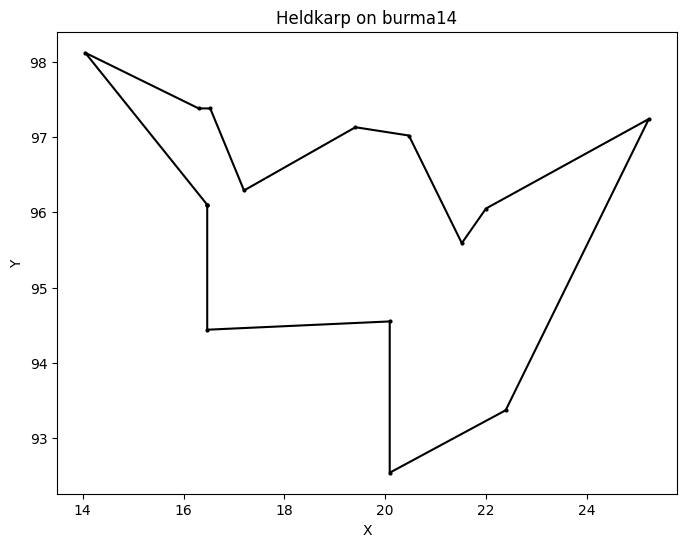

In [20]:
# algorithm = 'christofides'
algorithm = 'heldkarp'
dataset = 'burma14'
coords = read_tsp_coords(f'../data/{dataset}.tsp')
tour = read_tour(f'../result/{algorithm}_{dataset}.tour')
plot_tour(coords, tour, f'{algorithm.capitalize()} on {dataset}')